#### Setting up LLM

In [19]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.3-70b-versatile")

#### Creating State schema and StateGraph

In [20]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from typing import Annotated
from langgraph.graph.message import add_messages

In [21]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

class State(TypedDict):
    messages:Annotated[list,add_messages]

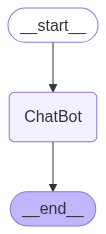

In [23]:
from IPython.display import Image,display

graph = StateGraph(State)

def chatbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

graph.add_node("ChatBot",chatbot)
graph.add_edge(START,"ChatBot")
graph.add_edge("ChatBot",END)

graph_builder = graph.compile(checkpointer=memory)
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [24]:
config0 = {"configurable":{"thread_id":1}}

In [25]:
from langchain_core.messages import HumanMessage
from pprint import pprint

msgs = [HumanMessage(content=f"Hi, I like to study about AI agents.")]
msgs = graph_builder.invoke({"messages":msgs}, config=config0)
for m in msgs["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hi, I like to study about AI agents.
================================== Ai Message ==================================

That's a fascinating field of study. AI agents are computer programs that use artificial intelligence to perform tasks, make decisions, and interact with their environment. They can be simple or complex, and are used in a wide range of applications, from chatbots and virtual assistants to autonomous vehicles and robots.

There are several types of AI agents, including:

1. **Simple Reflex Agents**: These agents react to the current state of the environment without considering future consequences.
2. **Model-Based Reflex Agents**: These agents maintain an internal model of the environment and use it to make decisions.
3. **Goal-Based Agents**: These agents have specific goals and use planning and problem-solving to achieve them.
4. **Utility-Based Agents**: These agents make decisions base

#### Streaming using .stream() method

In [26]:
config1 = {"configurable":{"thread_id":2}}

In [27]:
for chunk in graph_builder.stream({'messages':"I am currently learning to build AI agents using LangGraph."},config=config1,stream_mode="updates"):
    print(chunk)

{'ChatBot': {'messages': [AIMessage(content="LangGraph is an exciting technology that allows you to build AI agents capable of understanding and generating human-like language. It's a great tool for natural language processing (NLP) tasks, such as chatbots, language translation, and text summarization.\n\nWhat specific aspects of LangGraph are you currently learning or struggling with? Are you working on a particular project, or do you have any questions about how to get started with building AI agents using LangGraph? I'm here to help and provide guidance.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 101, 'prompt_tokens': 47, 'total_tokens': 148, 'completion_time': 0.445588142, 'prompt_time': 0.002424589, 'queue_time': 0.052833071, 'total_time': 0.448012731}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'finish_reason': 'stop', 'logprobs': None}, id='run--3da04429-a153-4faa-b875-218b6b2a8299-0', usage_metadata={'inp

In [28]:
for chunk in graph_builder.stream({'messages':"I am building multi tool agents using LangGraph."},config=config1,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='I am currently learning to build AI agents using LangGraph.', additional_kwargs={}, response_metadata={}, id='9a14efa3-b92c-4dca-a2fd-7bf801e6996b'), AIMessage(content="LangGraph is an exciting technology that allows you to build AI agents capable of understanding and generating human-like language. It's a great tool for natural language processing (NLP) tasks, such as chatbots, language translation, and text summarization.\n\nWhat specific aspects of LangGraph are you currently learning or struggling with? Are you working on a particular project, or do you have any questions about how to get started with building AI agents using LangGraph? I'm here to help and provide guidance.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 101, 'prompt_tokens': 47, 'total_tokens': 148, 'completion_time': 0.445588142, 'prompt_time': 0.002424589, 'queue_time': 0.052833071, 'total_time': 0.448012731}, 'model_name': 'llama-3.3-70b-versa

In [29]:
for chunk in graph_builder.stream({'messages':"I have started buiding basic ReAct agents"},config=config1,stream_mode="updates"):
    print(chunk)

{'ChatBot': {'messages': [AIMessage(content="ReAct agents are a fundamental component of LangGraph, and building basic ReAct agents is a great starting point for creating more complex multi-tool agents.\n\nReAct agents are designed to react to user input, process information, and generate responses. They're the building blocks of more advanced conversational AI systems.\n\nWhen building basic ReAct agents, you're likely working with LangGraph's visual interface, creating nodes, and connecting them to define the agent's behavior. You're probably familiar with concepts like:\n\n1. **Intent nodes**: Define the agent's intentions and goals.\n2. **Entity nodes**: Extract and process user input, such as entities, keywords, or phrases.\n3. **Action nodes**: Perform specific actions, like responding with a message or executing a task.\n4. **Condition nodes**: Control the flow of the agent's behavior based on conditions or rules.\n\nAs you build and refine your ReAct agents, you'll likely encou

#### Streaming using .astream_events() methods

In [30]:
async for event in graph_builder.astream_events({"messages":["What are ReAct agents?"]},config=config1,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['What are ReAct agents?']}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'cf96e56b-2398-4279-a5c4-c41ae2d6d155', 'metadata': {'thread_id': 2}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='I am currently learning to build AI agents using LangGraph.', additional_kwargs={}, response_metadata={}, id='9a14efa3-b92c-4dca-a2fd-7bf801e6996b'), AIMessage(content="LangGraph is an exciting technology that allows you to build AI agents capable of understanding and generating human-like language. It's a great tool for natural language processing (NLP) tasks, such as chatbots, language translation, and text summarization.\n\nWhat specific aspects of LangGraph are you currently learning or struggling with? Are you working on a particular project, or do you have any questions about how to get started with building AI agents using LangGraph? I'm here to help and provide guidance.", addition